**Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import optimizers
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data_path = "/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/DATASET-balanced.csv"
audio_data = pd.read_csv(data_path)

In [3]:
label_encoder = LabelEncoder()
audio_data['LABEL'] = label_encoder.fit_transform(audio_data['LABEL'])
     
audio_data.head()


,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,0
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,0
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,0
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,0
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,0


In [4]:
y = audio_data['LABEL']
X = audio_data.drop('LABEL', axis = 1)

In [5]:
X.columns

Index(['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20'],
      dtype='object')

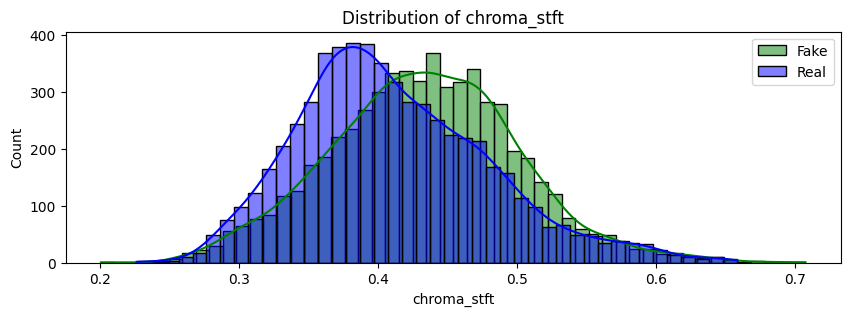

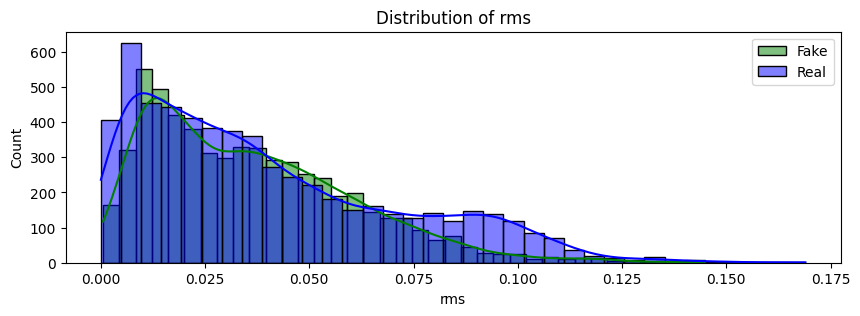

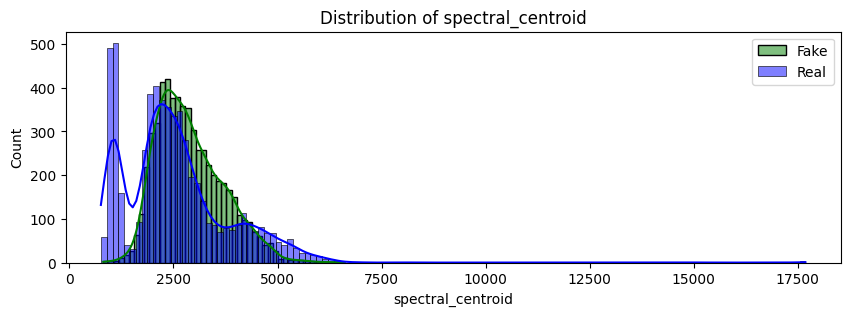

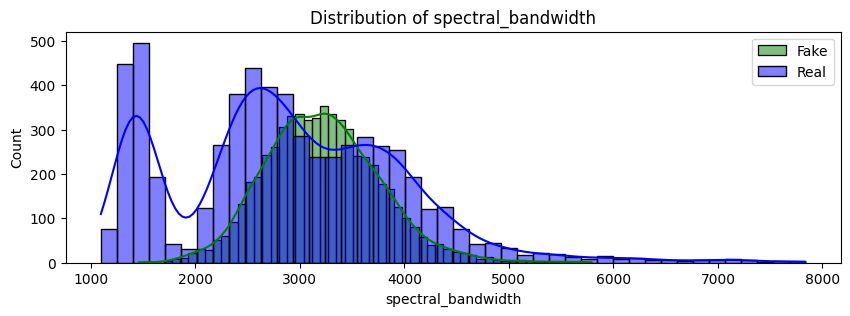

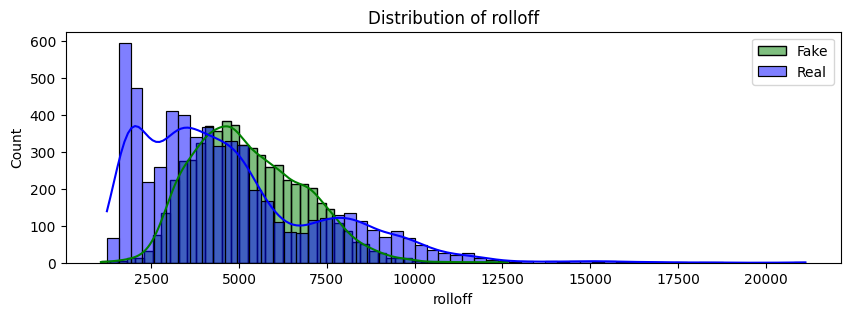

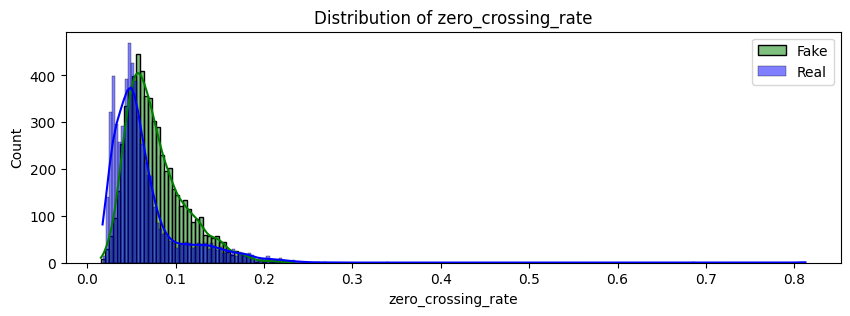

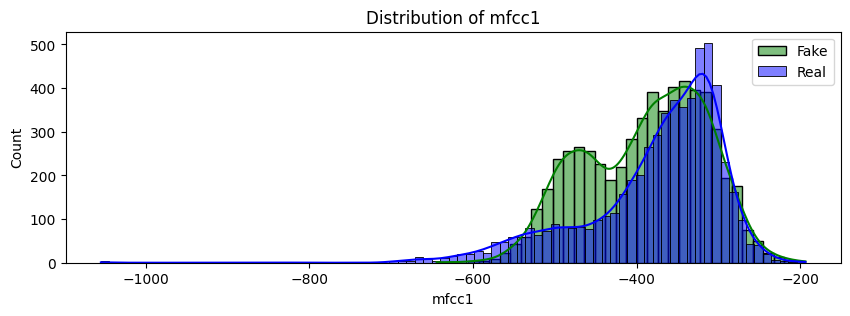

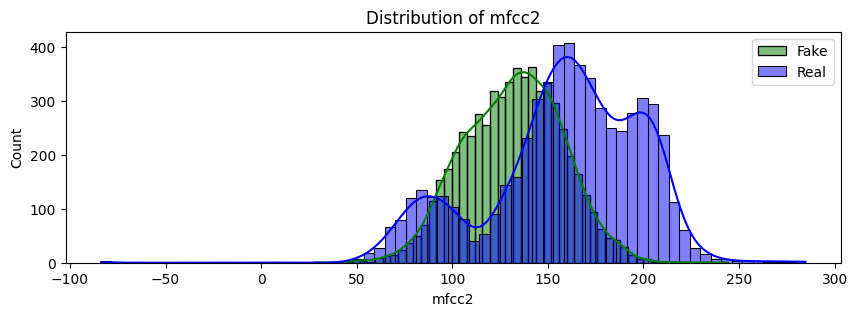

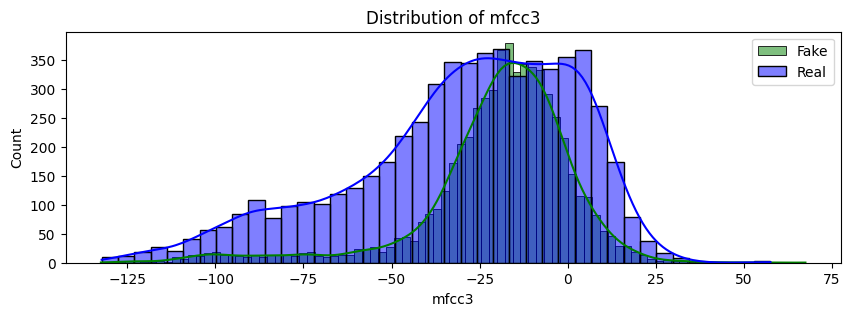

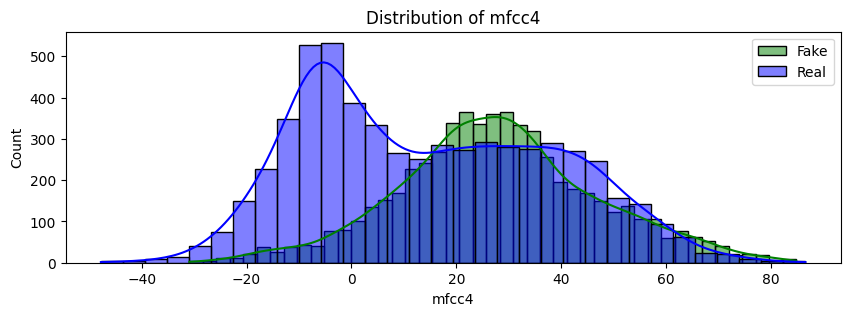

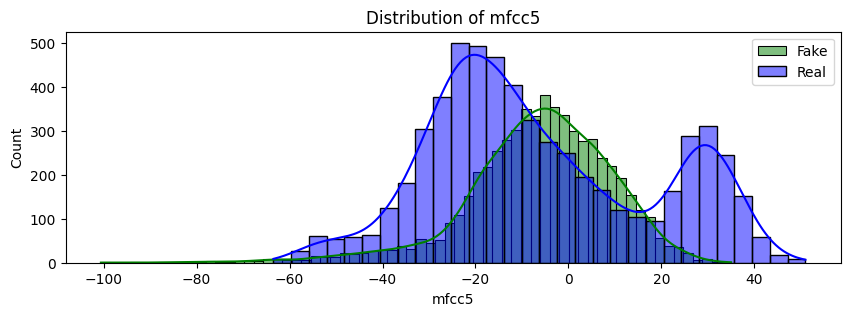

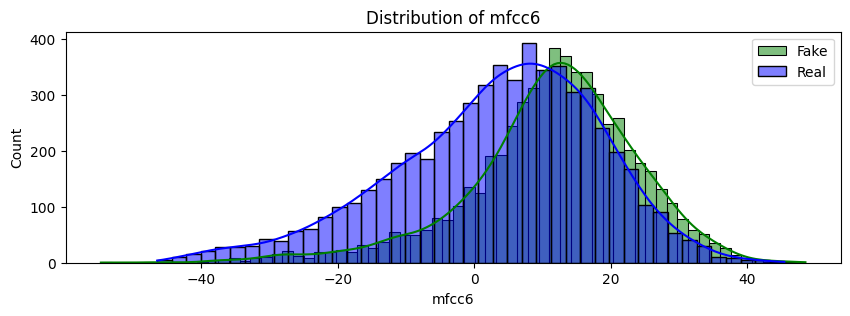

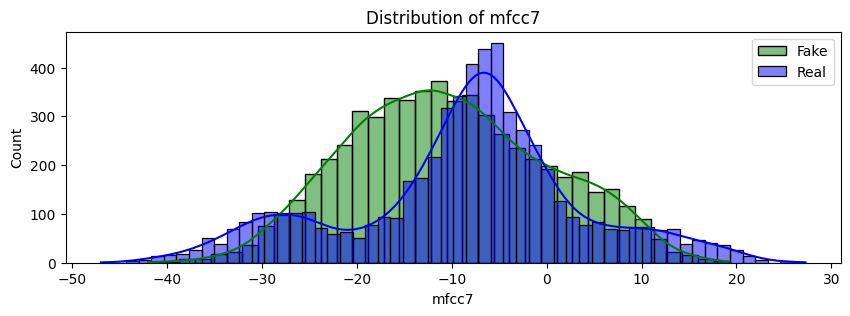

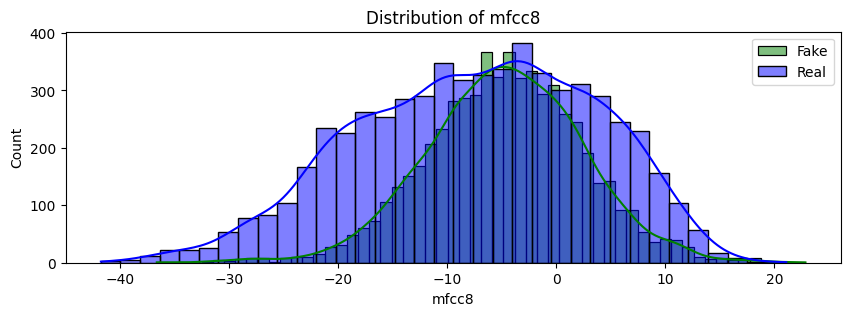

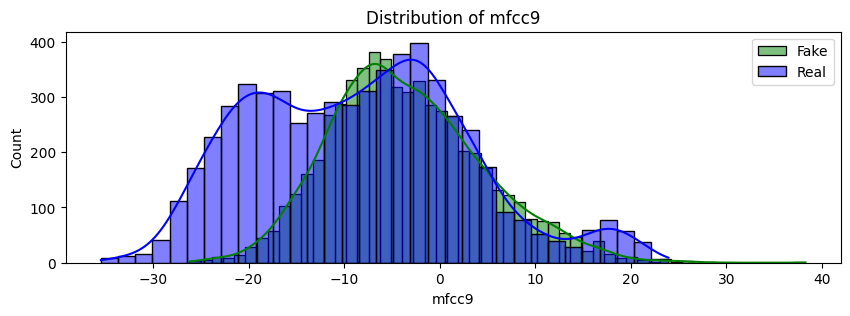

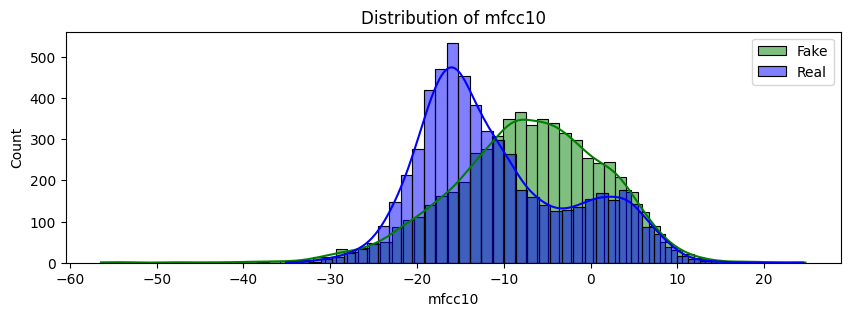

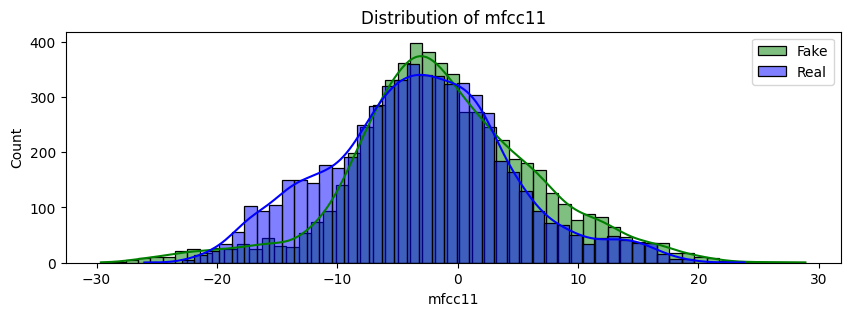

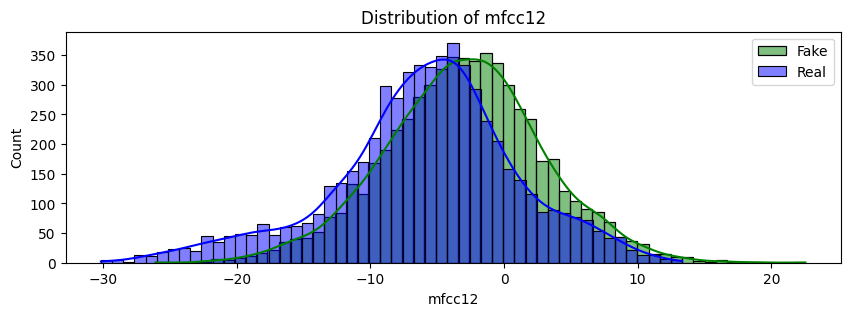

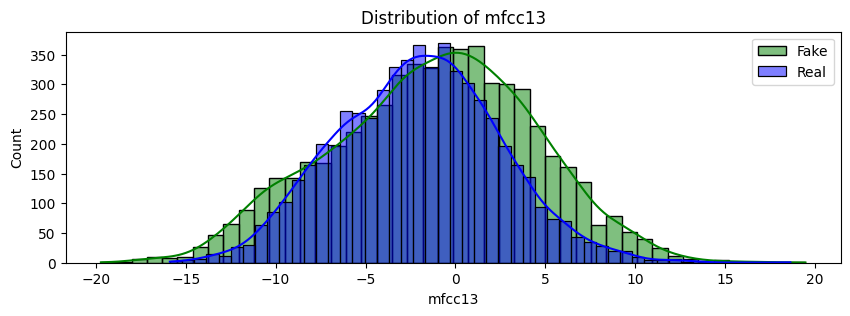

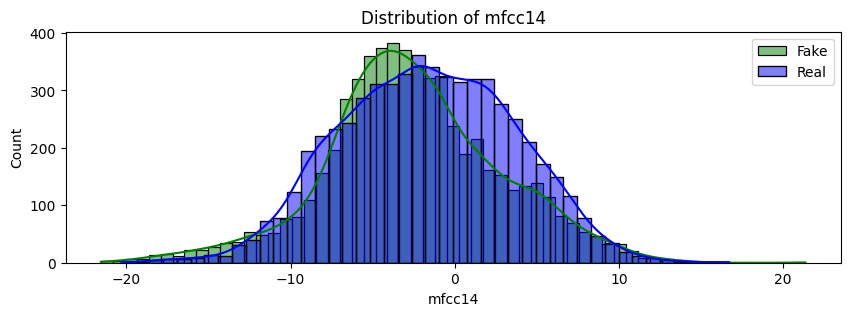

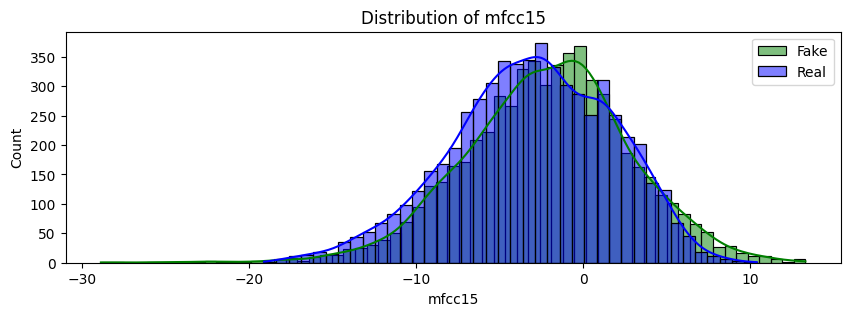

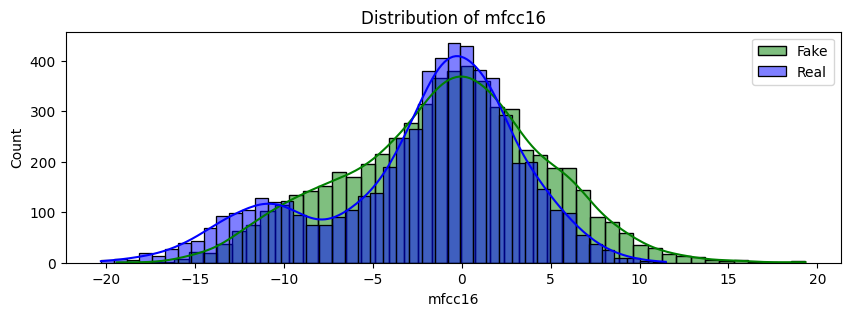

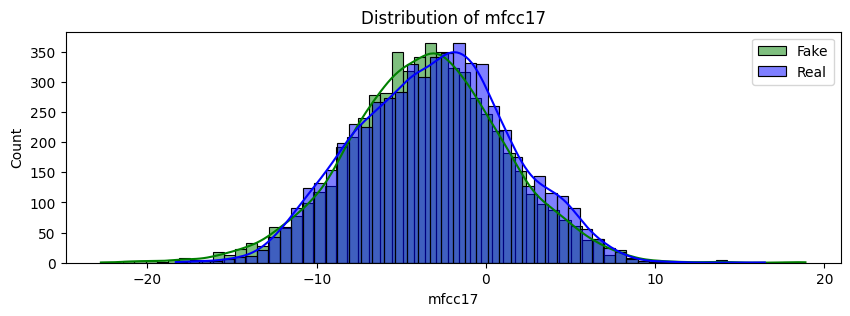

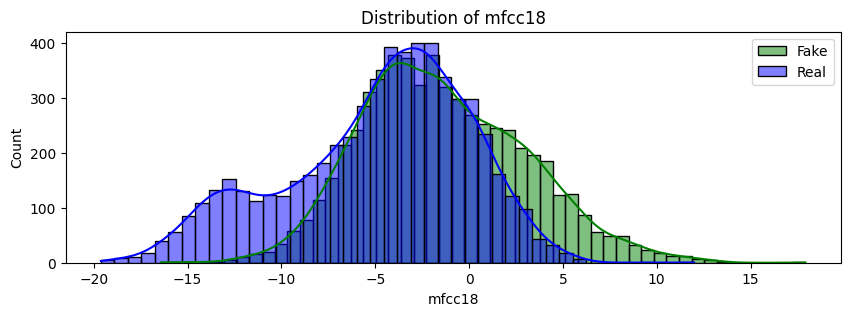

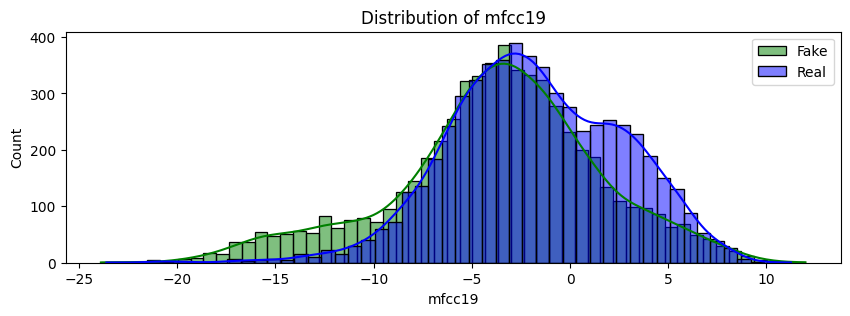

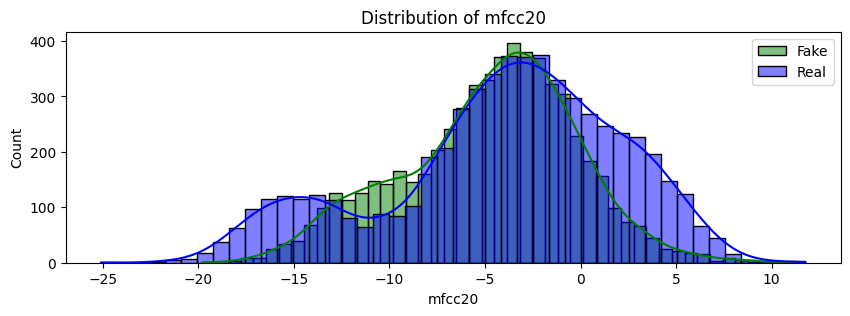

In [6]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
for column in X:
    plt.figure(figsize=(10, 3))
    sns.histplot(audio_data[audio_data['LABEL'] == 0][column], kde=True, label='Fake', color='green')
    sns.histplot(audio_data[audio_data['LABEL'] == 1][column], kde=True, label='Real', color='blue')
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()

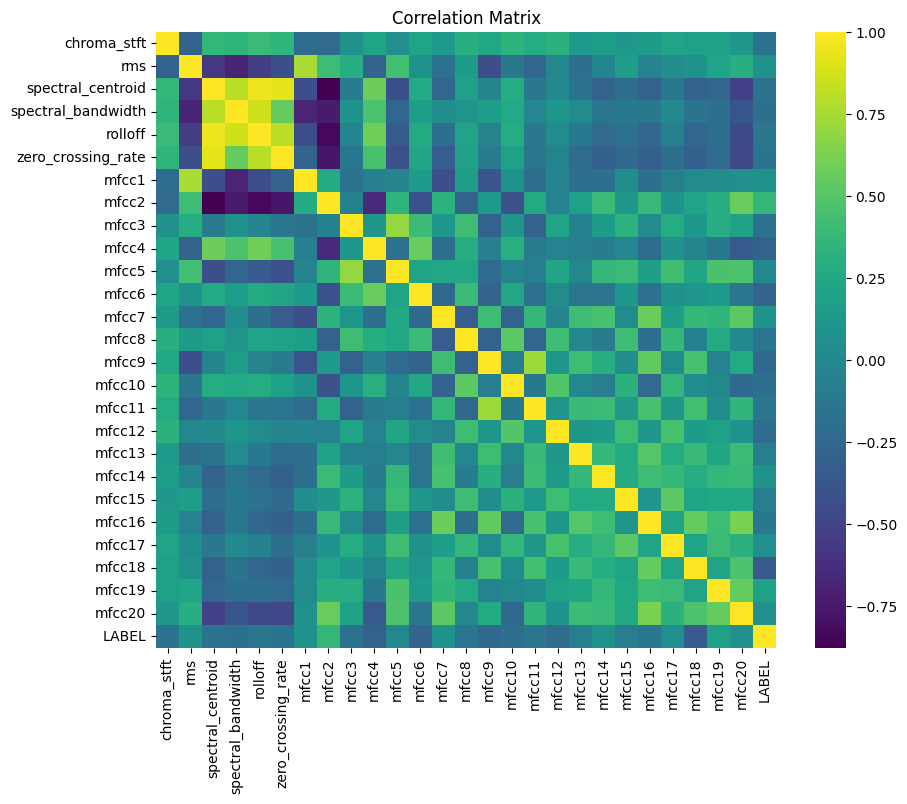

In [7]:
import seaborn as sns

correlation_matrix = audio_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

**Emotion Analysis**

In [8]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/DATASET-balanced.csv')

# Check the columns of your dataset
print(data.columns)

Index(['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20', 'LABEL'],
      dtype='object')


Significant Features (p-value < 0.05):
               Feature        p_value
0          chroma_stft   1.255482e-67
1                  rms   6.812161e-15
2    spectral_centroid   5.306269e-74
3   spectral_bandwidth   3.118181e-96
4              rolloff   2.509645e-49
5   zero_crossing_rate   3.000349e-65
6                mfcc1   6.695210e-16
7                mfcc2   0.000000e+00
8                mfcc3   6.127713e-83
9                mfcc4  2.610493e-236
11               mfcc6  7.010228e-208
12               mfcc7   7.667816e-17
13               mfcc8   2.102201e-55
14               mfcc9  6.431684e-159
15              mfcc10  1.167715e-114
16              mfcc11   4.988613e-48
17              mfcc12  1.483692e-126
18              mfcc13   5.113153e-18
19              mfcc14   2.877686e-19
20              mfcc15   3.141394e-23
21              mfcc16   3.076923e-36
22              mfcc17   9.220652e-08
23              mfcc18   0.000000e+00
24              mfcc19  5.049438e-101
25         

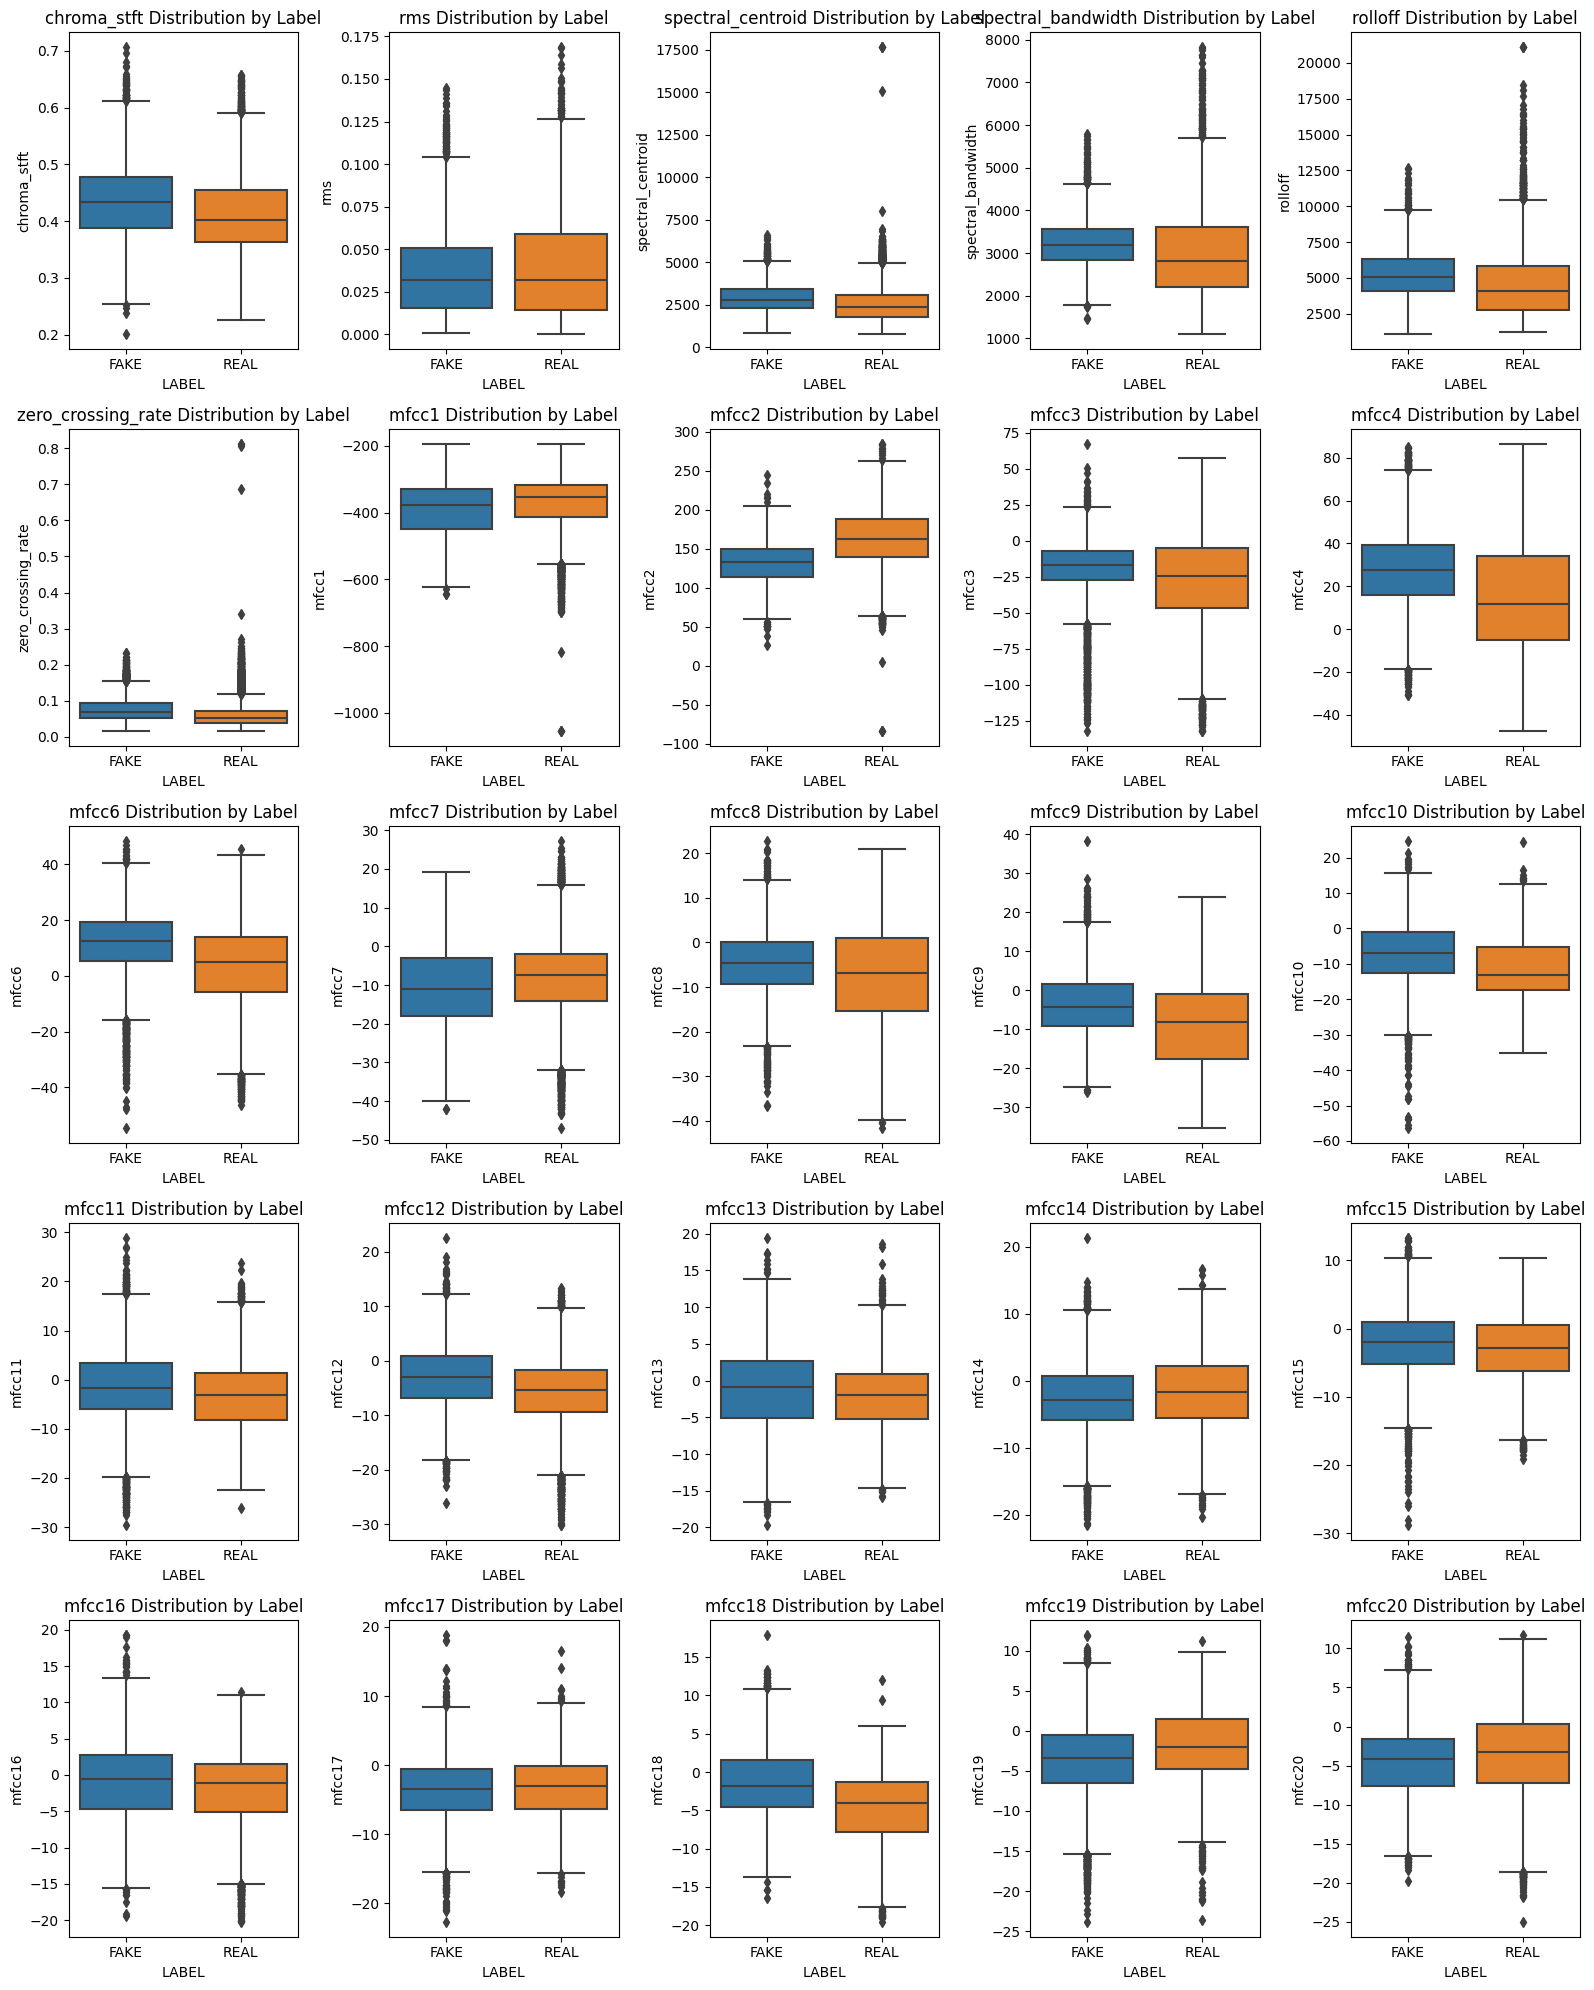

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
data = pd.read_csv('/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/DATASET-balanced.csv')

# Separate real and fake speech based on 'LABEL'
fake_speech = data[data['LABEL'] == 'FAKE']
real_speech = data[data['LABEL'] == 'REAL']

# List of features (excluding 'LABEL')
features = data.columns[:-1]  # All columns except 'LABEL'

# Initialize an empty dictionary to store p-values
p_values = {}

# Perform t-tests for each feature to compare real vs. fake speech
for feature in features:
    t_stat, p_value = ttest_ind(fake_speech[feature], real_speech[feature], equal_var=False)
    p_values[feature] = p_value

# Convert p-values to a DataFrame for better visualization
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Feature', 'p_value'])

# Show significant features (p-value < 0.05)
significant_features = p_values_df[p_values_df['p_value'] < 0.05]
print("Significant Features (p-value < 0.05):")
print(significant_features)

# Visualize significant feature differences using box plots
num_significant_features = len(significant_features)

# Dynamically adjust the number of rows for the subplots based on the number of significant features
num_rows = (num_significant_features // 5) + (num_significant_features % 5 > 0)

plt.figure(figsize=(16, num_rows * 4))  # Adjust height based on the number of rows

for i, feature in enumerate(significant_features['Feature']):
    plt.subplot(num_rows, 5, i + 1)  # Adjust subplot grid dynamically
    sns.boxplot(x='LABEL', y=feature, data=data)
    plt.title(f"{feature} Distribution by Label")

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Show the plots

**LSTM**

In [10]:
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True ,random_state=42)

In [11]:
X_reshaped = np.zeros((X_train.shape[0], 17, 10))

for i in range(17):
    X_reshaped[:, i, :] = X_train[:, i:i + 10]

y_reshaped = np.reshape(y_train, (y_train.shape[0], 1))

X_train = X_reshaped
y_train = y_reshaped

In [12]:
X_test_reshaped = np.zeros((X_test.shape[0], 17, 10))

for i in range(17):
    X_test_reshaped[:, i, :] = X_test[:, i:i + 10]

y_test_reshaped = np.reshape(y_test, (y_test.shape[0], 1))

X_test = X_test_reshaped
y_test = y_test_reshaped

In [13]:
print(X_train.shape)
print(y_train.shape)

(9422, 17, 10)
(9422, 1)


In [14]:
model = Sequential()

model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(64))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32 , activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss = BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 17, 64)         │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,497 (228.50 KB)

 Trainable params: 58,497 (228.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.6000 - loss: 0.6510
Epoch 2/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8753 - loss: 0.3333
Epoch 3/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9419 - loss: 0.1942
Epoch 4/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9600 - loss: 0.1470
Epoch 5/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9643 - loss: 0.1240
Epoch 6/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9685 - loss: 0.0988
Epoch 7/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9753 - loss: 0.0843
Epoch 8/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9766 - loss: 0.0773
Epoch 9/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9823 - loss: 0.0613
Epoch 10/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9853 - loss: 0.0527
Epoch 11/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9859 - loss: 0.0473
Epoch 12/100
295/295 ━━━━━━━

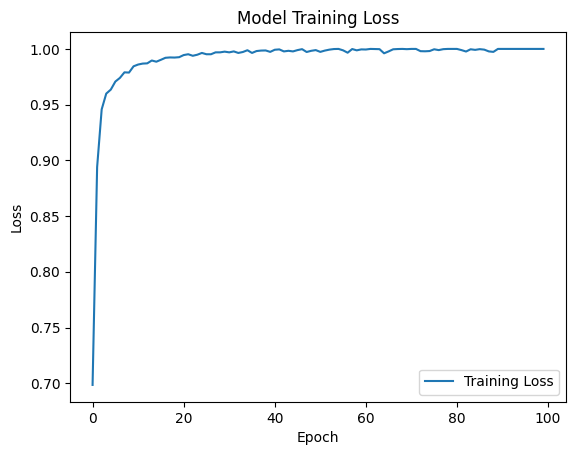

In [15]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100)

plt.plot(history.history['accuracy'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss'])
plt.show()

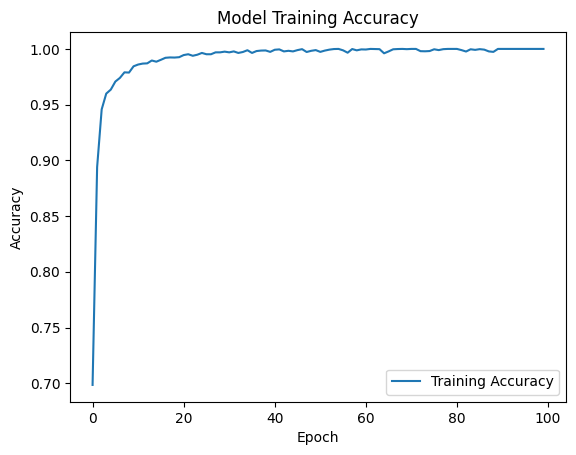

In [16]:
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy'])
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9850 - loss: 0.1312
Test Loss: 0.12969553470611572
Test Accuracy: 0.9842954277992249


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Classification Report:
              precision    recall  f1-score   support

        Fake       0.98      0.99      0.98      1193
        Real       0.99      0.98      0.98      1163

    accuracy                           0.98      2356
   macro avg       0.98      0.98      0.98      2356
weighted avg       0.98      0.98      0.98      2356



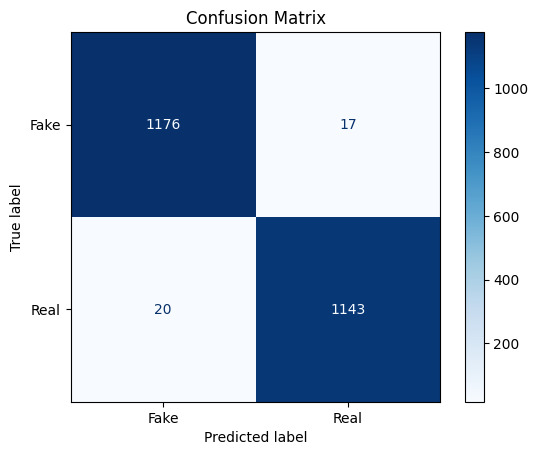

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict the labels for the test set
y_pred =model.predict(X_test)

# Since the output is probabilistic (sigmoid), threshold at 0.5 for binary classification
y_pred = (y_pred > 0.5).astype(int)

# Reshape the test labels back to 1D
y_test_flat = y_test.reshape(-1)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test_flat, y_pred, target_names=['Fake', 'Real']))

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test_flat, y_pred)

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Fake', 'Real'])
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


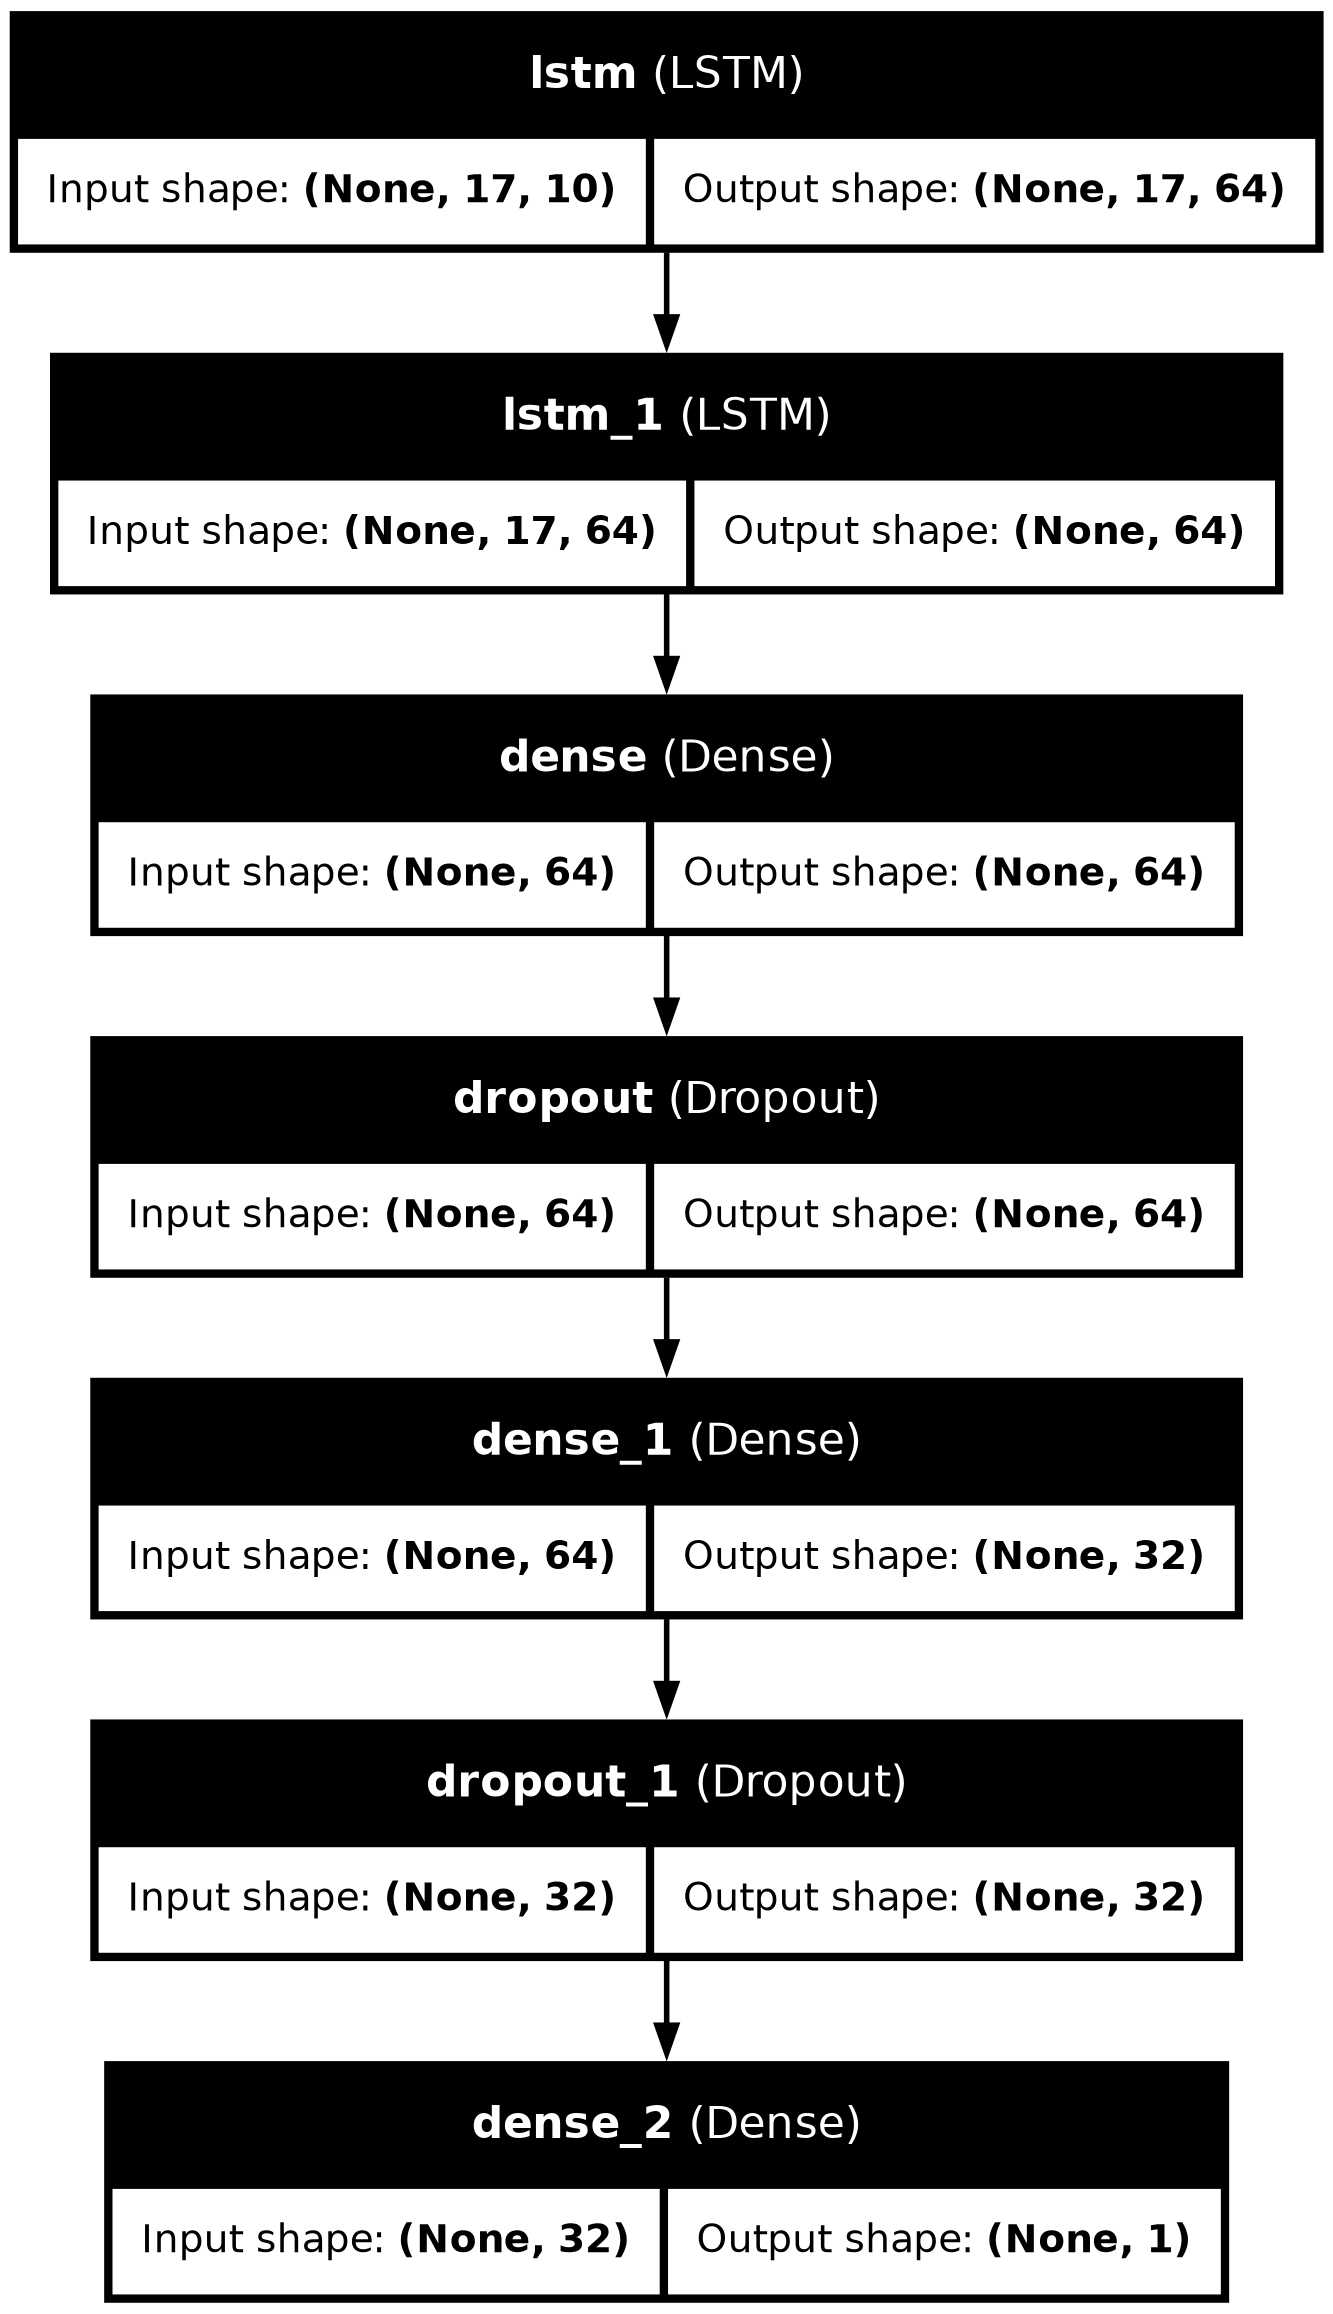

In [19]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='lstm_architecture.png', show_shapes=True, show_layer_names=True)